<a href="https://colab.research.google.com/github/Tasfia48/Predictive_Policing/blob/master/district_community_area_percentage_calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%time 
!apt update
!apt upgrade
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:3 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:4 http://security.ubuntu.com/ubuntu bionic-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Hit:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Reading package lists... Done
Building dependency tree       
Reading state information... Done
4 packages can be upgraded. Run 'apt 

In [3]:
pip install earthpy

     |████████████████████████████████| 1.4MB 2.8MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 18.2MB 233kB/s 
  Created wheel for earthpy: filename=earthpy-0.9.2-cp36-none-any.whl size=1365087 sha256=1b0200c836c26082e0af69565de055d6d7f77c407bf65ac2a7ddf659628902a2
  Stored in directory: /root/.cache/pip/wheels/27/f9/a5/026bb95ef7b12f9343b842da6897b4001c5b902550095cbbbe
Successfully built earthpy


In [3]:
import os
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import earthpy as et
import pandas as pd
# import pygeos
# import rtree

In [4]:
df_com = pd.read_csv('/content/drive/My Drive/CPD/Areas/CommAreas.csv')

In [6]:
comm_area_bound = gpd.read_file("/content/geo_export_87fc44da-8010-486c-85f9-93a81cceb1a3.shp")

In [7]:
comm_area_bound.geom_type.head()

0    Polygon
1    Polygon
2    Polygon
3    Polygon
4    Polygon
dtype: object

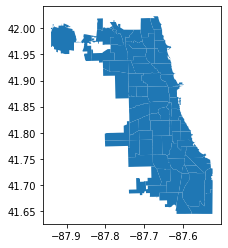

In [8]:
comm_area_bound.plot()

In [9]:
comm_area_bound.head()

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


In [10]:
pol_dis_bound = gpd.read_file("/content/geo_export_fa4b0c59-5f5d-48a5-9293-4a5b76ee95b7.shp")

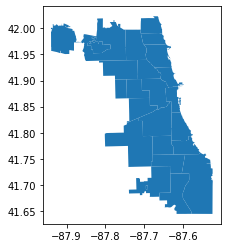

In [11]:
pol_dis_bound.plot()

In [12]:
pol_dis_bound['dist_num'] = pol_dis_bound['dist_num'].astype('int64') 

In [13]:
pol_dis_bound['dist_label']

0     17TH
1     20TH
2     31ST
3     31ST
4     19TH
5     25TH
6     14TH
7     31ST
8     22ND
9      5TH
10    24TH
11    16TH
12     8TH
13    18TH
14    12TH
15    11TH
16     7TH
17     3RD
18     4TH
19     6TH
20    10TH
21     1ST
22     9TH
23     2ND
24    15TH
Name: dist_label, dtype: object

In [14]:
pol_dis_bound = pol_dis_bound.sort_values(by = 'dist_num')

In [15]:
comm_area_bound.head()

,area,area_num_1,area_numbe,comarea,comarea_id,community,perimeter,shape_area,shape_len,geometry
0,0.0,35,35,0.0,0.0,DOUGLAS,0.0,4.600462e+07,31027.054510,"POLYGON ((-87.60914 41.84469, -87.60915 41.844..."
1,0.0,36,36,0.0,0.0,OAKLAND,0.0,1.691396e+07,19565.506153,"POLYGON ((-87.59215 41.81693, -87.59231 41.816..."
2,0.0,37,37,0.0,0.0,FULLER PARK,0.0,1.991670e+07,25339.089750,"POLYGON ((-87.62880 41.80189, -87.62879 41.801..."
3,0.0,38,38,0.0,0.0,GRAND BOULEVARD,0.0,4.849250e+07,28196.837157,"POLYGON ((-87.60671 41.81681, -87.60670 41.816..."
4,0.0,39,39,0.0,0.0,KENWOOD,0.0,2.907174e+07,23325.167906,"POLYGON ((-87.59215 41.81693, -87.59215 41.816..."


In [16]:
df1 = pol_dis_bound[["dist_num","geometry"]]
df2 = comm_area_bound[["community","geometry"]]

In [21]:
res_intersection = gpd.overlay(df1,df2, how='intersection')

In [38]:
result = pd.merge(df2,res_intersection, on='community', how='outer', validate="one_to_many")


In [40]:
result['comm_area'] = result['geometry_x'].area


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


In [51]:
result= result.rename(columns={'geometry_x':'geo_comm','geometry_y':'geo_intersec'})

In [52]:
result

,community,geo_comm,dist_num,geo_intersec,intersection_area,comm_area,intersection_area_perc
0,DOUGLAS,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",1,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",1.534606e-04,0.000463,33.127688
1,DOUGLAS,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",2,"POLYGON ((-87.60769 41.83858, -87.60618 41.838...",3.078244e-04,0.000463,66.450359
2,DOUGLAS,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",9,"POLYGON ((-87.62991 41.84555, -87.62991 41.845...",2.249471e-07,0.000463,0.048560
3,OAKLAND,"POLYGON ((-87.59215 41.81693, -87.59231 41.816...",2,"POLYGON ((-87.60280 41.83137, -87.60279 41.831...",1.626445e-04,0.000170,95.514118
4,FULLER PARK,"POLYGON ((-87.62880 41.80189, -87.62879 41.801...",2,"POLYGON ((-87.63077 41.79455, -87.63077 41.794...",4.423698e-05,0.000200,22.066642
...,...,...,...,...,...,...,...
192,OHARE,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ...",16,"MULTIPOLYGON (((-87.83481 41.93758, -87.83499 ...",3.750280e-03,0.003752,99.940868
193,OHARE,"MULTIPOLYGON (((-87.83658 41.98640, -87.83658 ...",31,"MULTIPOLYGON (((-87.83669 41.97477, -87.83663 ...",5.164504e-08,0.003752,0.001376
194,EDGEWATER,"POLYGON ((-87.65456 41.99817, -87.65456 41.998...",20,"POLYGON ((-87.66029 41.99092, -87.66029 41.990...",3.345432e-04,0.000489,68.412191
195,EDGEWATER,"POLYGON ((-87.65456 41.99817, -87.65456 41.998...",24,"POLYGON ((-87.65455 41.99816, -87.65453 41.998...",1.544679e-04,0.000489,31.587807


In [42]:
result["intersection_area_perc"] = (result['intersection_area']/result['comm_area'])*100

In [53]:
com_dis_percentage = result[['dist_num','community','intersection_area_perc']]

In [54]:
com_dis_percentage.to_csv('com_dis_percentage.csv')

In [26]:
res_intersection

,dist_num,community,geometry,intersection_area
0,1,DOUGLAS,"POLYGON ((-87.60914 41.84469, -87.60915 41.844...",1.534606e-04
1,2,DOUGLAS,"POLYGON ((-87.60769 41.83858, -87.60618 41.838...",3.078244e-04
2,9,DOUGLAS,"POLYGON ((-87.62991 41.84555, -87.62991 41.845...",2.249471e-07
3,1,NEAR WEST SIDE,"POLYGON ((-87.63451 41.86013, -87.63562 41.860...",2.173142e-04
4,9,NEAR WEST SIDE,"MULTIPOLYGON (((-87.63480 41.85888, -87.63478 ...",1.400402e-09
...,...,...,...,...
192,20,EDGEWATER,"POLYGON ((-87.66029 41.99092, -87.66029 41.990...",3.345432e-04
193,24,EDGEWATER,"POLYGON ((-87.65455 41.99816, -87.65453 41.998...",1.544679e-04
194,22,MOUNT GREENWOOD,"POLYGON ((-87.69709 41.68797, -87.69709 41.687...",7.582858e-04
195,31,MOUNT GREENWOOD,"POLYGON ((-87.69576 41.69170, -87.69590 41.691...",9.467295e-07


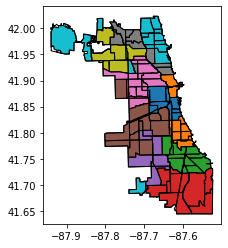

In [23]:
ax = res_intersection.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');